# RNN Model with 1 to 6 Layers - with Dropout (0.4) & ES

In [1]:
import pandas as pd
import rnn_loop
from processing import preprocessing
from keras.models import load_model

In [2]:
# earlyStopping patience = 50 
# models = 6 
# epochs = 500
# dropout = 0.4

In [3]:
load_processed_df_from_disk = True

if load_processed_df_from_disk:
    # load processed spectoragramms
    data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')

else:
    # preprocess the raw dataset
    data_df = preprocessing.load_dataset()
    data_df['feature'] = data_df['feature'].apply(preprocessing.calculate_mean_mfcc, preprocessing.DEFAULT_SAMPLE_RATE)

data_df = preprocessing.filter_mfccs(data_df)

X_train, X_test, y_train, y_test = preprocessing.create_training_data_RNN(data_df)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 173, 40)
X_test shape: (1466, 173, 40)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [5]:
model = rnn_loop.RNN_loop(num_outputs, num_models=6, DP_rate=0.4)

In [6]:
model.build_RNN_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6ce24dd6d8>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6ce24d63c8>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6d21014be0>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6d02a9da20>,
 'model_5': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6d1de207b8>,
 'model_6': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f6cedf81d68>}

In [7]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 8ms/step - loss: 2.4224 - accuracy: 0.1153
Pre-train

46/46 [==============================] - 0s 8ms/step - loss: 2.3217 - accuracy: 0.0362
Pre-training accuracy: 3.6153%

 SUMMARY FOR MODEL  6
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)     

In [8]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=256)

Training for model  1  has started.
Epoch 1/500
22/23 [===========================>..] - ETA: 0s - loss: 2.3203 - accuracy: 0.1587
Epoch 00001: val_loss improved from inf to 2.14090, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 2.3155 - accuracy: 0.1607 - val_loss: 2.1409 - val_accuracy: 0.2442
Epoch 2/500
22/23 [===========================>..] - ETA: 0s - loss: 2.1387 - accuracy: 0.2196
Epoch 00002: val_loss improved from 2.14090 to 2.01708, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 2.1401 - accuracy: 0.2177 - val_loss: 2.0171 - val_accuracy: 0.3008
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 2.0296 - accuracy: 0.2608
Epoch 00003: val_loss improved from 2.01708 to 1.89262, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 2.0304 - accu

Epoch 25/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9264 - accuracy: 0.6699
Epoch 00025: val_loss improved from 0.78395 to 0.76321, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.9254 - accuracy: 0.6699 - val_loss: 0.7632 - val_accuracy: 0.7701
Epoch 26/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9053 - accuracy: 0.6836
Epoch 00026: val_loss improved from 0.76321 to 0.76233, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.9049 - accuracy: 0.6845 - val_loss: 0.7623 - val_accuracy: 0.7647
Epoch 27/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8926 - accuracy: 0.6841
Epoch 00027: val_loss improved from 0.76233 to 0.74698, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.8919 - accuracy: 0.6847 - val_loss: 0.74

Epoch 51/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.8086
Epoch 00051: val_loss improved from 0.52513 to 0.52420, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.5321 - accuracy: 0.8091 - val_loss: 0.5242 - val_accuracy: 0.8336
Epoch 52/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5197 - accuracy: 0.8159
Epoch 00052: val_loss improved from 0.52420 to 0.51527, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.5221 - accuracy: 0.8144 - val_loss: 0.5153 - val_accuracy: 0.8377
Epoch 53/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4896 - accuracy: 0.8237
Epoch 00053: val_loss did not improve from 0.51527
23/23 [==============================] - 1s 24ms/step - loss: 0.4939 - accuracy: 0.8227 - val_loss: 0.5185 - val_accuracy: 0.8486
Epoch 54/500
22/23 [===================

Epoch 79/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3869 - accuracy: 0.8647
Epoch 00079: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.3859 - accuracy: 0.8647 - val_loss: 0.5435 - val_accuracy: 0.8506
Epoch 80/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3745 - accuracy: 0.8629
Epoch 00080: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.3731 - accuracy: 0.8632 - val_loss: 0.4797 - val_accuracy: 0.8547
Epoch 81/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3681 - accuracy: 0.8686
Epoch 00081: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 23ms/step - loss: 0.3668 - accuracy: 0.8688 - val_loss: 0.4760 - val_accuracy: 0.8574
Epoch 82/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3367 - accuracy: 0.8778
Epoch 00082: val_loss did not improve from 0.44552
23/23 [===============

Epoch 109/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2734 - accuracy: 0.8986
Epoch 00109: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.2717 - accuracy: 0.8997 - val_loss: 0.6012 - val_accuracy: 0.8568
Epoch 110/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3353 - accuracy: 0.8841
Epoch 00110: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.3397 - accuracy: 0.8824 - val_loss: 0.5964 - val_accuracy: 0.8424
Epoch 111/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3394 - accuracy: 0.8817
Epoch 00111: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 23ms/step - loss: 0.3378 - accuracy: 0.8818 - val_loss: 0.4807 - val_accuracy: 0.8649
Epoch 112/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2910 - accuracy: 0.8935
Epoch 00112: val_loss did not improve from 0.44552
23/23 [===========

Epoch 139/500
20/23 [=========================>....] - ETA: 0s - loss: 0.2188 - accuracy: 0.9227
Epoch 00139: val_loss did not improve from 0.44552
23/23 [==============================] - 0s 20ms/step - loss: 0.2259 - accuracy: 0.9202 - val_loss: 0.5618 - val_accuracy: 0.8724
Epoch 140/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2582 - accuracy: 0.9109
Epoch 00140: val_loss did not improve from 0.44552
23/23 [==============================] - 0s 21ms/step - loss: 0.2591 - accuracy: 0.9106 - val_loss: 0.5199 - val_accuracy: 0.8752
Epoch 141/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2342 - accuracy: 0.9142
Epoch 00141: val_loss did not improve from 0.44552
23/23 [==============================] - 0s 21ms/step - loss: 0.2314 - accuracy: 0.9149 - val_loss: 0.5648 - val_accuracy: 0.8820
Epoch 142/500
23/23 [==============================] - ETA: 0s - loss: 0.2580 - accuracy: 0.9123
Epoch 00142: val_loss did not improve from 0.44552
23/23 [===========

Epoch 169/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2162 - accuracy: 0.9199
Epoch 00169: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 25ms/step - loss: 0.2154 - accuracy: 0.9202 - val_loss: 0.6406 - val_accuracy: 0.8834
Epoch 170/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2039 - accuracy: 0.9268
Epoch 00170: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.2044 - accuracy: 0.9266 - val_loss: 0.6403 - val_accuracy: 0.8643
Epoch 171/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2562 - accuracy: 0.9096
Epoch 00171: val_loss did not improve from 0.44552
23/23 [==============================] - 1s 24ms/step - loss: 0.2553 - accuracy: 0.9101 - val_loss: 0.6042 - val_accuracy: 0.8636
Epoch 172/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2247 - accuracy: 0.9157
Epoch 00172: val_loss did not improve from 0.44552
23/23 [===========

Epoch 9/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5264 - accuracy: 0.4407
Epoch 00009: val_loss improved from 1.37183 to 1.32799, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.5276 - accuracy: 0.4393 - val_loss: 1.3280 - val_accuracy: 0.5477
Epoch 10/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4899 - accuracy: 0.4505
Epoch 00010: val_loss improved from 1.32799 to 1.28869, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.4864 - accuracy: 0.4511 - val_loss: 1.2887 - val_accuracy: 0.5580
Epoch 11/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4544 - accuracy: 0.4737
Epoch 00011: val_loss improved from 1.28869 to 1.24478, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.4543 - accuracy: 0.4738 - val_loss: 1.244

Epoch 34/500
23/23 [==============================] - ETA: 0s - loss: 0.9690 - accuracy: 0.6550
Epoch 00034: val_loss improved from 0.88927 to 0.88862, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.9690 - accuracy: 0.6550 - val_loss: 0.8886 - val_accuracy: 0.7258
Epoch 35/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9578 - accuracy: 0.6632
Epoch 00035: val_loss improved from 0.88862 to 0.86051, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.9566 - accuracy: 0.6639 - val_loss: 0.8605 - val_accuracy: 0.7367
Epoch 36/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9539 - accuracy: 0.6623
Epoch 00036: val_loss did not improve from 0.86051
23/23 [==============================] - 1s 24ms/step - loss: 0.9575 - accuracy: 0.6622 - val_loss: 0.8738 - val_accuracy: 0.7244
Epoch 37/500
22/23 [===================

Epoch 61/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7266 - accuracy: 0.7440
Epoch 00061: val_loss improved from 0.77138 to 0.76485, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.7258 - accuracy: 0.7446 - val_loss: 0.7648 - val_accuracy: 0.7681
Epoch 62/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7140 - accuracy: 0.7537
Epoch 00062: val_loss did not improve from 0.76485
23/23 [==============================] - 1s 23ms/step - loss: 0.7151 - accuracy: 0.7538 - val_loss: 0.7757 - val_accuracy: 0.7681
Epoch 63/500
23/23 [==============================] - ETA: 0s - loss: 0.7178 - accuracy: 0.7446
Epoch 00063: val_loss did not improve from 0.76485
23/23 [==============================] - 1s 23ms/step - loss: 0.7178 - accuracy: 0.7446 - val_loss: 0.7854 - val_accuracy: 0.7749
Epoch 64/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7074 - accuracy: 0.7516
Epoch 00

21/23 [==========================>...] - ETA: 0s - loss: 0.5953 - accuracy: 0.7961
Epoch 00089: val_loss improved from 0.72931 to 0.72782, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 22ms/step - loss: 0.5968 - accuracy: 0.7975 - val_loss: 0.7278 - val_accuracy: 0.7960
Epoch 90/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6013 - accuracy: 0.7917
Epoch 00090: val_loss did not improve from 0.72782
23/23 [==============================] - 1s 24ms/step - loss: 0.5978 - accuracy: 0.7941 - val_loss: 0.7522 - val_accuracy: 0.7967
Epoch 91/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5895 - accuracy: 0.7960
Epoch 00091: val_loss did not improve from 0.72782
23/23 [==============================] - 1s 23ms/step - loss: 0.5866 - accuracy: 0.7970 - val_loss: 0.7548 - val_accuracy: 0.8022
Epoch 92/500
23/23 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.7929
Epoch 00092: val_loss

Epoch 118/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5146 - accuracy: 0.8233
Epoch 00118: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 24ms/step - loss: 0.5164 - accuracy: 0.8220 - val_loss: 0.7468 - val_accuracy: 0.8042
Epoch 119/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5154 - accuracy: 0.8276
Epoch 00119: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 23ms/step - loss: 0.5139 - accuracy: 0.8284 - val_loss: 0.7760 - val_accuracy: 0.7981
Epoch 120/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.8228
Epoch 00120: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 23ms/step - loss: 0.5345 - accuracy: 0.8226 - val_loss: 0.7381 - val_accuracy: 0.8076
Epoch 121/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5261 - accuracy: 0.8166
Epoch 00121: val_loss did not improve from 0.71303
23/23 [===========

Epoch 148/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4536 - accuracy: 0.8514
Epoch 00148: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 23ms/step - loss: 0.4521 - accuracy: 0.8517 - val_loss: 0.7674 - val_accuracy: 0.8165
Epoch 149/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4630 - accuracy: 0.8505
Epoch 00149: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 23ms/step - loss: 0.4617 - accuracy: 0.8502 - val_loss: 0.7444 - val_accuracy: 0.8151
Epoch 150/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8461
Epoch 00150: val_loss did not improve from 0.71303
23/23 [==============================] - 1s 23ms/step - loss: 0.4639 - accuracy: 0.8446 - val_loss: 0.7763 - val_accuracy: 0.8111
Epoch 151/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4653 - accuracy: 0.8453
Epoch 00151: val_loss did not improve from 0.71303
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 0.4300 - accuracy: 0.8597
Epoch 00177: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.4257 - accuracy: 0.8621 - val_loss: 0.8472 - val_accuracy: 0.8097
Epoch 178/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4421 - accuracy: 0.8560
Epoch 00178: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.4443 - accuracy: 0.8546 - val_loss: 0.7610 - val_accuracy: 0.8172
Epoch 179/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4050 - accuracy: 0.8661
Epoch 00179: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.4034 - accuracy: 0.8659 - val_loss: 0.7799 - val_accuracy: 0.8220
Epoch 180/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3966 - accuracy: 0.8631
Epoch 00180: val_loss did not improve from 0.70478
23/23 [=========================

Epoch 207/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.8782
Epoch 00207: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 22ms/step - loss: 0.3815 - accuracy: 0.8772 - val_loss: 0.7678 - val_accuracy: 0.8308
Epoch 208/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3788 - accuracy: 0.8725
Epoch 00208: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.3775 - accuracy: 0.8729 - val_loss: 0.8046 - val_accuracy: 0.8336
Epoch 209/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3741 - accuracy: 0.8844
Epoch 00209: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 24ms/step - loss: 0.3753 - accuracy: 0.8835 - val_loss: 0.7562 - val_accuracy: 0.8370
Epoch 210/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4094 - accuracy: 0.8734
Epoch 00210: val_loss did not improve from 0.70478
23/23 [===========

Epoch 237/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4140 - accuracy: 0.8706
Epoch 00237: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 24ms/step - loss: 0.4159 - accuracy: 0.8715 - val_loss: 0.8128 - val_accuracy: 0.8254
Epoch 238/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3695 - accuracy: 0.8814
Epoch 00238: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.3693 - accuracy: 0.8819 - val_loss: 0.8371 - val_accuracy: 0.8281
Epoch 239/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3700 - accuracy: 0.8821
Epoch 00239: val_loss did not improve from 0.70478
23/23 [==============================] - 1s 23ms/step - loss: 0.3681 - accuracy: 0.8828 - val_loss: 0.7753 - val_accuracy: 0.8397
Epoch 240/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3424 - accuracy: 0.8883
Epoch 00240: val_loss did not improve from 0.70478
23/23 [===========

Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 1.9841 - accuracy: 0.2445
Epoch 00003: val_loss improved from 1.95566 to 1.79664, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.9803 - accuracy: 0.2448 - val_loss: 1.7966 - val_accuracy: 0.3602
Epoch 4/500
22/23 [===========================>..] - ETA: 0s - loss: 1.8912 - accuracy: 0.2811
Epoch 00004: val_loss improved from 1.79664 to 1.68821, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 1.8935 - accuracy: 0.2798 - val_loss: 1.6882 - val_accuracy: 0.3636
Epoch 5/500
22/23 [===========================>..] - ETA: 0s - loss: 1.8153 - accuracy: 0.2999
Epoch 00005: val_loss improved from 1.68821 to 1.63586, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.8151 - accuracy: 0.3005 - val_loss: 1.6359 

Epoch 28/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1593 - accuracy: 0.5536
Epoch 00028: val_loss did not improve from 1.10391
23/23 [==============================] - 1s 25ms/step - loss: 1.1591 - accuracy: 0.5535 - val_loss: 1.1114 - val_accuracy: 0.6085
Epoch 29/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1662 - accuracy: 0.5518
Epoch 00029: val_loss did not improve from 1.10391
23/23 [==============================] - 1s 25ms/step - loss: 1.1698 - accuracy: 0.5506 - val_loss: 1.1094 - val_accuracy: 0.6010
Epoch 30/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1490 - accuracy: 0.5648
Epoch 00030: val_loss did not improve from 1.10391
23/23 [==============================] - 1s 24ms/step - loss: 1.1485 - accuracy: 0.5642 - val_loss: 1.1048 - val_accuracy: 0.6248
Epoch 31/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1426 - accuracy: 0.5625
Epoch 00031: val_loss improved from 1.10391 to 1.08811, saving model to m

Epoch 56/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9264 - accuracy: 0.6621
Epoch 00056: val_loss did not improve from 0.99985
23/23 [==============================] - 1s 23ms/step - loss: 0.9301 - accuracy: 0.6606 - val_loss: 1.0301 - val_accuracy: 0.6685
Epoch 57/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9251 - accuracy: 0.6660
Epoch 00057: val_loss did not improve from 0.99985
23/23 [==============================] - 1s 24ms/step - loss: 0.9260 - accuracy: 0.6652 - val_loss: 1.0145 - val_accuracy: 0.6692
Epoch 58/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9053 - accuracy: 0.6687
Epoch 00058: val_loss improved from 0.99985 to 0.99149, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.9079 - accuracy: 0.6678 - val_loss: 0.9915 - val_accuracy: 0.6835
Epoch 59/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8823 - accuracy: 0.6777
Epoch 00

Epoch 85/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7782 - accuracy: 0.7239
Epoch 00085: val_loss did not improve from 0.93816
23/23 [==============================] - 1s 24ms/step - loss: 0.7827 - accuracy: 0.7231 - val_loss: 0.9629 - val_accuracy: 0.7121
Epoch 86/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7884 - accuracy: 0.7280
Epoch 00086: val_loss improved from 0.93816 to 0.90682, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.7856 - accuracy: 0.7280 - val_loss: 0.9068 - val_accuracy: 0.7203
Epoch 87/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7800 - accuracy: 0.7262
Epoch 00087: val_loss did not improve from 0.90682
23/23 [==============================] - 1s 24ms/step - loss: 0.7794 - accuracy: 0.7239 - val_loss: 0.9154 - val_accuracy: 0.7278
Epoch 88/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7552 - accuracy: 0.7370
Epoch 00

Epoch 114/500
23/23 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.7685
Epoch 00114: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 21ms/step - loss: 0.6759 - accuracy: 0.7685 - val_loss: 0.9659 - val_accuracy: 0.7497
Epoch 115/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6788 - accuracy: 0.7642
Epoch 00115: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 22ms/step - loss: 0.6779 - accuracy: 0.7656 - val_loss: 0.9551 - val_accuracy: 0.7497
Epoch 116/500
23/23 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7709
Epoch 00116: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 21ms/step - loss: 0.6774 - accuracy: 0.7709 - val_loss: 0.9457 - val_accuracy: 0.7476
Epoch 117/500
23/23 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.7748
Epoch 00117: val_loss did not improve from 0.89942
23/23 [===========

Epoch 144/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6175 - accuracy: 0.7923
Epoch 00144: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.6178 - accuracy: 0.7917 - val_loss: 0.9742 - val_accuracy: 0.7681
Epoch 145/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6262 - accuracy: 0.7915
Epoch 00145: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.6280 - accuracy: 0.7891 - val_loss: 1.0044 - val_accuracy: 0.7599
Epoch 146/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6356 - accuracy: 0.7960
Epoch 00146: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.6342 - accuracy: 0.7951 - val_loss: 0.9441 - val_accuracy: 0.7626
Epoch 147/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6386 - accuracy: 0.7837
Epoch 00147: val_loss did not improve from 0.89942
23/23 [===========

Epoch 174/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5198 - accuracy: 0.8327
Epoch 00174: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.5238 - accuracy: 0.8318 - val_loss: 1.0223 - val_accuracy: 0.7804
Epoch 175/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.8187
Epoch 00175: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.5441 - accuracy: 0.8193 - val_loss: 1.1048 - val_accuracy: 0.7844
Epoch 176/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.8269
Epoch 00176: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 23ms/step - loss: 0.5402 - accuracy: 0.8270 - val_loss: 1.0511 - val_accuracy: 0.7838
Epoch 177/500
23/23 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.8290
Epoch 00177: val_loss did not improve from 0.89942
23/23 [===========

Epoch 204/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4921 - accuracy: 0.8500
Epoch 00204: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4927 - accuracy: 0.8490 - val_loss: 1.0468 - val_accuracy: 0.7872
Epoch 205/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4814 - accuracy: 0.8464
Epoch 00205: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4823 - accuracy: 0.8452 - val_loss: 1.0641 - val_accuracy: 0.7879
Epoch 206/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4858 - accuracy: 0.8411
Epoch 00206: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 23ms/step - loss: 0.4877 - accuracy: 0.8401 - val_loss: 1.0369 - val_accuracy: 0.7817
Epoch 207/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4917 - accuracy: 0.8475
Epoch 00207: val_loss did not improve from 0.89942
23/23 [===========

Epoch 234/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4631 - accuracy: 0.8532
Epoch 00234: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4642 - accuracy: 0.8536 - val_loss: 1.1167 - val_accuracy: 0.7947
Epoch 235/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4787 - accuracy: 0.8517
Epoch 00235: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 23ms/step - loss: 0.4743 - accuracy: 0.8536 - val_loss: 1.0411 - val_accuracy: 0.7892
Epoch 236/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4551 - accuracy: 0.8597
Epoch 00236: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4535 - accuracy: 0.8604 - val_loss: 1.1243 - val_accuracy: 0.7885
Epoch 237/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4849 - accuracy: 0.8485
Epoch 00237: val_loss did not improve from 0.89942
23/23 [===========

Epoch 264/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4093 - accuracy: 0.8675
Epoch 00264: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.4108 - accuracy: 0.8679 - val_loss: 1.1803 - val_accuracy: 0.7885
Epoch 265/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.8643
Epoch 00265: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4509 - accuracy: 0.8621 - val_loss: 1.1407 - val_accuracy: 0.7817
Epoch 266/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4468 - accuracy: 0.8622
Epoch 00266: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 25ms/step - loss: 0.4445 - accuracy: 0.8640 - val_loss: 1.1055 - val_accuracy: 0.7947
Epoch 267/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.8736
Epoch 00267: val_loss did not improve from 0.89942
23/23 [===========

Epoch 294/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3962 - accuracy: 0.8858
Epoch 00294: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.3944 - accuracy: 0.8864 - val_loss: 1.0535 - val_accuracy: 0.8008
Epoch 295/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4175 - accuracy: 0.8784
Epoch 00295: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.4150 - accuracy: 0.8787 - val_loss: 1.1394 - val_accuracy: 0.7981
Epoch 296/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4513 - accuracy: 0.8658
Epoch 00296: val_loss did not improve from 0.89942
23/23 [==============================] - 1s 24ms/step - loss: 0.4504 - accuracy: 0.8654 - val_loss: 1.1255 - val_accuracy: 0.7872
Epoch 297/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4145 - accuracy: 0.8720
Epoch 00297: val_loss did not improve from 0.89942
23/23 [===========

Epoch 324/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3566 - accuracy: 0.8903
Epoch 00324: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 21ms/step - loss: 0.3596 - accuracy: 0.8894 - val_loss: 1.1778 - val_accuracy: 0.8076
Epoch 325/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3754 - accuracy: 0.8862
Epoch 00325: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 21ms/step - loss: 0.3705 - accuracy: 0.8870 - val_loss: 1.1874 - val_accuracy: 0.8035
Epoch 326/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.8874
Epoch 00326: val_loss did not improve from 0.89942
23/23 [==============================] - 0s 22ms/step - loss: 0.3827 - accuracy: 0.8864 - val_loss: 1.2689 - val_accuracy: 0.7926
Epoch 327/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4132 - accuracy: 0.8780
Epoch 00327: val_loss did not improve from 0.89942
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 1.4916 - accuracy: 0.4277
Epoch 00013: val_loss improved from 1.37746 to 1.33813, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.4912 - accuracy: 0.4264 - val_loss: 1.3381 - val_accuracy: 0.4795
Epoch 14/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4448 - accuracy: 0.4331
Epoch 00014: val_loss improved from 1.33813 to 1.30704, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.4457 - accuracy: 0.4323 - val_loss: 1.3070 - val_accuracy: 0.4898
Epoch 15/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4253 - accuracy: 0.4419
Epoch 00015: val_loss improved from 1.30704 to 1.28823, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.4248 - accuracy: 0.4434 - val_loss: 1.2882 - val_accu

Epoch 39/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0702 - accuracy: 0.5879
Epoch 00039: val_loss did not improve from 1.05485
23/23 [==============================] - 1s 25ms/step - loss: 1.0718 - accuracy: 0.5881 - val_loss: 1.0907 - val_accuracy: 0.6371
Epoch 40/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0625 - accuracy: 0.6010
Epoch 00040: val_loss improved from 1.05485 to 1.03025, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.0630 - accuracy: 0.6030 - val_loss: 1.0302 - val_accuracy: 0.6432
Epoch 41/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0663 - accuracy: 0.6010
Epoch 00041: val_loss improved from 1.03025 to 1.02942, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.0648 - accuracy: 0.6014 - val_loss: 1.0294 - val_accuracy: 0.6460
Epoch 42/500
22/23 [===================

Epoch 68/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8663 - accuracy: 0.6822
Epoch 00068: val_loss improved from 0.99173 to 0.98653, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8702 - accuracy: 0.6804 - val_loss: 0.9865 - val_accuracy: 0.7033
Epoch 69/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8759 - accuracy: 0.6779
Epoch 00069: val_loss did not improve from 0.98653
23/23 [==============================] - 1s 25ms/step - loss: 0.8738 - accuracy: 0.6786 - val_loss: 1.0073 - val_accuracy: 0.6924
Epoch 70/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8679 - accuracy: 0.6813
Epoch 00070: val_loss did not improve from 0.98653
23/23 [==============================] - 1s 24ms/step - loss: 0.8668 - accuracy: 0.6806 - val_loss: 1.0034 - val_accuracy: 0.6930
Epoch 71/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8664 - accuracy: 0.6857
Epoch 00

Epoch 97/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7783 - accuracy: 0.7306
Epoch 00097: val_loss did not improve from 0.95587
23/23 [==============================] - 1s 25ms/step - loss: 0.7754 - accuracy: 0.7304 - val_loss: 0.9814 - val_accuracy: 0.7231
Epoch 98/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7802 - accuracy: 0.7314
Epoch 00098: val_loss did not improve from 0.95587
23/23 [==============================] - 1s 25ms/step - loss: 0.7798 - accuracy: 0.7323 - val_loss: 1.0130 - val_accuracy: 0.7292
Epoch 99/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7848 - accuracy: 0.7305
Epoch 00099: val_loss did not improve from 0.95587
23/23 [==============================] - 1s 25ms/step - loss: 0.7852 - accuracy: 0.7304 - val_loss: 1.0111 - val_accuracy: 0.7265
Epoch 100/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7606 - accuracy: 0.7331
Epoch 00100: val_loss did not improve from 0.95587
23/23 [==============

22/23 [===========================>..] - ETA: 0s - loss: 0.7059 - accuracy: 0.7607
Epoch 00126: val_loss did not improve from 0.95362
23/23 [==============================] - 1s 25ms/step - loss: 0.7039 - accuracy: 0.7606 - val_loss: 0.9970 - val_accuracy: 0.7333
Epoch 127/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6954 - accuracy: 0.7653
Epoch 00127: val_loss did not improve from 0.95362
23/23 [==============================] - 1s 25ms/step - loss: 0.6966 - accuracy: 0.7644 - val_loss: 0.9607 - val_accuracy: 0.7401
Epoch 128/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6845 - accuracy: 0.7651
Epoch 00128: val_loss improved from 0.95362 to 0.94896, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6835 - accuracy: 0.7657 - val_loss: 0.9490 - val_accuracy: 0.7469
Epoch 129/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6898 - accuracy: 0.7720
Epoch 00129: val_l

Epoch 155/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6078 - accuracy: 0.7951
Epoch 00155: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 26ms/step - loss: 0.6082 - accuracy: 0.7949 - val_loss: 0.9877 - val_accuracy: 0.7694
Epoch 156/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6092 - accuracy: 0.7939
Epoch 00156: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 26ms/step - loss: 0.6066 - accuracy: 0.7958 - val_loss: 1.0197 - val_accuracy: 0.7660
Epoch 157/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6086 - accuracy: 0.7994
Epoch 00157: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.6078 - accuracy: 0.7992 - val_loss: 1.0853 - val_accuracy: 0.7715
Epoch 158/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6131 - accuracy: 0.7983
Epoch 00158: val_loss did not improve from 0.93150
23/23 [===========

Epoch 185/500
23/23 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.8048
Epoch 00185: val_loss did not improve from 0.93150
23/23 [==============================] - 0s 20ms/step - loss: 0.6020 - accuracy: 0.8048 - val_loss: 1.1441 - val_accuracy: 0.7722
Epoch 186/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5850 - accuracy: 0.8099
Epoch 00186: val_loss did not improve from 0.93150
23/23 [==============================] - 0s 20ms/step - loss: 0.5862 - accuracy: 0.8098 - val_loss: 1.1687 - val_accuracy: 0.7776
Epoch 187/500
23/23 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.8091
Epoch 00187: val_loss did not improve from 0.93150
23/23 [==============================] - 0s 21ms/step - loss: 0.5866 - accuracy: 0.8091 - val_loss: 1.1357 - val_accuracy: 0.7694
Epoch 188/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5783 - accuracy: 0.8104
Epoch 00188: val_loss did not improve from 0.93150
23/23 [===========

Epoch 215/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.8235
Epoch 00215: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 24ms/step - loss: 0.5441 - accuracy: 0.8222 - val_loss: 1.1122 - val_accuracy: 0.7790
Epoch 216/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5521 - accuracy: 0.8152
Epoch 00216: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5496 - accuracy: 0.8149 - val_loss: 1.0698 - val_accuracy: 0.7872
Epoch 217/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.8224
Epoch 00217: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5394 - accuracy: 0.8227 - val_loss: 1.1850 - val_accuracy: 0.7769
Epoch 218/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5503 - accuracy: 0.8230
Epoch 00218: val_loss did not improve from 0.93150
23/23 [===========

Epoch 245/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5641 - accuracy: 0.8294
Epoch 00245: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5642 - accuracy: 0.8289 - val_loss: 1.1163 - val_accuracy: 0.7885
Epoch 246/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4998 - accuracy: 0.8345
Epoch 00246: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5001 - accuracy: 0.8347 - val_loss: 1.1499 - val_accuracy: 0.7920
Epoch 247/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.8453
Epoch 00247: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 24ms/step - loss: 0.4976 - accuracy: 0.8425 - val_loss: 1.1407 - val_accuracy: 0.7940
Epoch 248/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4819 - accuracy: 0.8446
Epoch 00248: val_loss did not improve from 0.93150
23/23 [===========

Epoch 275/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4943 - accuracy: 0.8455
Epoch 00275: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4933 - accuracy: 0.8464 - val_loss: 1.3720 - val_accuracy: 0.7988
Epoch 276/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4629 - accuracy: 0.8612
Epoch 00276: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4643 - accuracy: 0.8603 - val_loss: 1.3359 - val_accuracy: 0.7967
Epoch 277/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4462 - accuracy: 0.8553
Epoch 00277: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 24ms/step - loss: 0.4500 - accuracy: 0.8538 - val_loss: 1.4150 - val_accuracy: 0.7913
Epoch 278/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8509
Epoch 00278: val_loss did not improve from 0.93150
23/23 [===========

Epoch 305/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4582 - accuracy: 0.8581
Epoch 00305: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4615 - accuracy: 0.8579 - val_loss: 1.3644 - val_accuracy: 0.7947
Epoch 306/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4474 - accuracy: 0.8626
Epoch 00306: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4450 - accuracy: 0.8632 - val_loss: 1.1821 - val_accuracy: 0.8022
Epoch 307/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4354 - accuracy: 0.8604
Epoch 00307: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4324 - accuracy: 0.8615 - val_loss: 1.3073 - val_accuracy: 0.8022
Epoch 308/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4409 - accuracy: 0.8633
Epoch 00308: val_loss did not improve from 0.93150
23/23 [===========

Epoch 335/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4278 - accuracy: 0.8670
Epoch 00335: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4287 - accuracy: 0.8662 - val_loss: 1.2200 - val_accuracy: 0.8070
Epoch 336/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4241 - accuracy: 0.8661
Epoch 00336: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4217 - accuracy: 0.8657 - val_loss: 1.2735 - val_accuracy: 0.8042
Epoch 337/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4594 - accuracy: 0.8588
Epoch 00337: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.4597 - accuracy: 0.8589 - val_loss: 1.4443 - val_accuracy: 0.8070
Epoch 338/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4607 - accuracy: 0.8596
Epoch 00338: val_loss did not improve from 0.93150
23/23 [===========

Epoch 365/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.8260
Epoch 00365: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5345 - accuracy: 0.8251 - val_loss: 1.1237 - val_accuracy: 0.7885
Epoch 366/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.8368
Epoch 00366: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 25ms/step - loss: 0.5415 - accuracy: 0.8364 - val_loss: 1.0549 - val_accuracy: 0.7749
Epoch 367/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5122 - accuracy: 0.8393
Epoch 00367: val_loss did not improve from 0.93150
23/23 [==============================] - 1s 24ms/step - loss: 0.5113 - accuracy: 0.8401 - val_loss: 1.2263 - val_accuracy: 0.7804
Epoch 368/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4958 - accuracy: 0.8386
Epoch 00368: val_loss did not improve from 0.93150
23/23 [===========

21/23 [==========================>...] - ETA: 0s - loss: 1.6511 - accuracy: 0.3642
Epoch 00014: val_loss improved from 1.53551 to 1.52365, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 0s 22ms/step - loss: 1.6466 - accuracy: 0.3610 - val_loss: 1.5236 - val_accuracy: 0.4209
Epoch 15/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6110 - accuracy: 0.3709
Epoch 00015: val_loss improved from 1.52365 to 1.51419, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 1.6143 - accuracy: 0.3682 - val_loss: 1.5142 - val_accuracy: 0.4181
Epoch 16/500
23/23 [==============================] - ETA: 0s - loss: 1.5892 - accuracy: 0.3779
Epoch 00016: val_loss improved from 1.51419 to 1.47296, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 1.5892 - accuracy: 0.3779 - val_loss: 1.4730 - val_accu

22/23 [===========================>..] - ETA: 0s - loss: 1.1976 - accuracy: 0.5249
Epoch 00040: val_loss did not improve from 1.28924
23/23 [==============================] - 1s 25ms/step - loss: 1.1991 - accuracy: 0.5224 - val_loss: 1.3178 - val_accuracy: 0.5668
Epoch 41/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2193 - accuracy: 0.5300
Epoch 00041: val_loss did not improve from 1.28924
23/23 [==============================] - 1s 25ms/step - loss: 1.2233 - accuracy: 0.5284 - val_loss: 1.3052 - val_accuracy: 0.5539
Epoch 42/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2202 - accuracy: 0.5250
Epoch 00042: val_loss did not improve from 1.28924
23/23 [==============================] - 1s 25ms/step - loss: 1.2207 - accuracy: 0.5252 - val_loss: 1.3063 - val_accuracy: 0.5505
Epoch 43/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1991 - accuracy: 0.5339
Epoch 00043: val_loss did not improve from 1.28924
23/23 [============================

Epoch 69/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0449 - accuracy: 0.5858
Epoch 00069: val_loss did not improve from 1.26590
23/23 [==============================] - 1s 25ms/step - loss: 1.0455 - accuracy: 0.5862 - val_loss: 1.3315 - val_accuracy: 0.6030
Epoch 70/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0344 - accuracy: 0.5953
Epoch 00070: val_loss did not improve from 1.26590
23/23 [==============================] - 1s 26ms/step - loss: 1.0354 - accuracy: 0.5948 - val_loss: 1.3570 - val_accuracy: 0.6139
Epoch 71/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0456 - accuracy: 0.5977
Epoch 00071: val_loss improved from 1.26590 to 1.26486, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.0438 - accuracy: 0.5977 - val_loss: 1.2649 - val_accuracy: 0.6180
Epoch 72/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0404 - accuracy: 0.6026
Epoch 00

22/23 [===========================>..] - ETA: 0s - loss: 0.9626 - accuracy: 0.6310
Epoch 00098: val_loss did not improve from 1.26486
23/23 [==============================] - 1s 24ms/step - loss: 0.9593 - accuracy: 0.6333 - val_loss: 1.3758 - val_accuracy: 0.6460
Epoch 99/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9414 - accuracy: 0.6314
Epoch 00099: val_loss did not improve from 1.26486
23/23 [==============================] - 1s 25ms/step - loss: 0.9429 - accuracy: 0.6315 - val_loss: 1.4355 - val_accuracy: 0.6521
Epoch 100/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9182 - accuracy: 0.6367
Epoch 00100: val_loss did not improve from 1.26486
23/23 [==============================] - 1s 25ms/step - loss: 0.9170 - accuracy: 0.6368 - val_loss: 1.4003 - val_accuracy: 0.6630
Epoch 101/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9269 - accuracy: 0.6529
Epoch 00101: val_loss did not improve from 1.26486
23/23 [==========================

22/23 [===========================>..] - ETA: 0s - loss: 0.8715 - accuracy: 0.6658
Epoch 00127: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.8695 - accuracy: 0.6661 - val_loss: 1.3135 - val_accuracy: 0.6753
Epoch 128/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8553 - accuracy: 0.6760
Epoch 00128: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.8546 - accuracy: 0.6770 - val_loss: 1.3525 - val_accuracy: 0.6835
Epoch 129/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8401 - accuracy: 0.6754
Epoch 00129: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.8381 - accuracy: 0.6767 - val_loss: 1.4332 - val_accuracy: 0.6951
Epoch 130/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8612 - accuracy: 0.6854
Epoch 00130: val_loss did not improve from 1.21064
23/23 [=========================

Epoch 157/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8180 - accuracy: 0.6992
Epoch 00157: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.8109 - accuracy: 0.7019 - val_loss: 1.3057 - val_accuracy: 0.6842
Epoch 158/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8145 - accuracy: 0.7053
Epoch 00158: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.8153 - accuracy: 0.7030 - val_loss: 1.3821 - val_accuracy: 0.7012
Epoch 159/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8296 - accuracy: 0.7049
Epoch 00159: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.8342 - accuracy: 0.7030 - val_loss: 1.3726 - val_accuracy: 0.6951
Epoch 160/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7847 - accuracy: 0.7118
Epoch 00160: val_loss did not improve from 1.21064
23/23 [===========

Epoch 187/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7224 - accuracy: 0.7356
Epoch 00187: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.7177 - accuracy: 0.7367 - val_loss: 1.5682 - val_accuracy: 0.7231
Epoch 188/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7021 - accuracy: 0.7498
Epoch 00188: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.7041 - accuracy: 0.7482 - val_loss: 1.5061 - val_accuracy: 0.7067
Epoch 189/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7309 - accuracy: 0.7358
Epoch 00189: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.7388 - accuracy: 0.7352 - val_loss: 1.3355 - val_accuracy: 0.6930
Epoch 190/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8409 - accuracy: 0.7088
Epoch 00190: val_loss did not improve from 1.21064
23/23 [===========

Epoch 217/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6718 - accuracy: 0.7633
Epoch 00217: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 22ms/step - loss: 0.6780 - accuracy: 0.7634 - val_loss: 1.4941 - val_accuracy: 0.7176
Epoch 218/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6803 - accuracy: 0.7633
Epoch 00218: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 22ms/step - loss: 0.6837 - accuracy: 0.7627 - val_loss: 1.5301 - val_accuracy: 0.7217
Epoch 219/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6665 - accuracy: 0.7690
Epoch 00219: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 22ms/step - loss: 0.6719 - accuracy: 0.7688 - val_loss: 1.5223 - val_accuracy: 0.7278
Epoch 220/500
23/23 [==============================] - ETA: 0s - loss: 0.6563 - accuracy: 0.7640
Epoch 00220: val_loss did not improve from 1.21064
23/23 [===========

Epoch 247/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6838 - accuracy: 0.7678
Epoch 00247: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.6943 - accuracy: 0.7668 - val_loss: 1.4464 - val_accuracy: 0.7299
Epoch 248/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7062 - accuracy: 0.7571
Epoch 00248: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.7068 - accuracy: 0.7569 - val_loss: 1.4586 - val_accuracy: 0.7217
Epoch 249/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6776 - accuracy: 0.7788
Epoch 00249: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.6780 - accuracy: 0.7770 - val_loss: 1.4015 - val_accuracy: 0.7203
Epoch 250/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6711 - accuracy: 0.7614
Epoch 00250: val_loss did not improve from 1.21064
23/23 [===========

Epoch 277/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6012 - accuracy: 0.8015
Epoch 00277: val_loss did not improve from 1.21064
23/23 [==============================] - 0s 21ms/step - loss: 0.6013 - accuracy: 0.8002 - val_loss: 1.4234 - val_accuracy: 0.7408
Epoch 278/500
23/23 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.8045
Epoch 00278: val_loss did not improve from 1.21064
23/23 [==============================] - 0s 22ms/step - loss: 0.5913 - accuracy: 0.8045 - val_loss: 1.3499 - val_accuracy: 0.7401
Epoch 279/500
23/23 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.7982
Epoch 00279: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.5899 - accuracy: 0.7982 - val_loss: 1.2897 - val_accuracy: 0.7503
Epoch 280/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5826 - accuracy: 0.8029
Epoch 00280: val_loss did not improve from 1.21064
23/23 [===========

Epoch 307/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5602 - accuracy: 0.8111
Epoch 00307: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.5607 - accuracy: 0.8110 - val_loss: 1.7093 - val_accuracy: 0.7531
Epoch 308/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5500 - accuracy: 0.8118
Epoch 00308: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5540 - accuracy: 0.8108 - val_loss: 1.9405 - val_accuracy: 0.7729
Epoch 309/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5877 - accuracy: 0.8105
Epoch 00309: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5838 - accuracy: 0.8111 - val_loss: 1.7845 - val_accuracy: 0.7578
Epoch 310/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5532 - accuracy: 0.8098
Epoch 00310: val_loss did not improve from 1.21064
23/23 [===========

Epoch 337/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5613 - accuracy: 0.8134
Epoch 00337: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5612 - accuracy: 0.8137 - val_loss: 1.7121 - val_accuracy: 0.7578
Epoch 338/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.8198
Epoch 00338: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5444 - accuracy: 0.8191 - val_loss: 1.7952 - val_accuracy: 0.7613
Epoch 339/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5440 - accuracy: 0.8306
Epoch 00339: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.5465 - accuracy: 0.8285 - val_loss: 1.7442 - val_accuracy: 0.7599
Epoch 340/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6953 - accuracy: 0.7772
Epoch 00340: val_loss did not improve from 1.21064
23/23 [===========

Epoch 367/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5039 - accuracy: 0.8370
Epoch 00367: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.5064 - accuracy: 0.8355 - val_loss: 1.8088 - val_accuracy: 0.7647
Epoch 368/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5316 - accuracy: 0.8281
Epoch 00368: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5330 - accuracy: 0.8263 - val_loss: 1.6871 - val_accuracy: 0.7585
Epoch 369/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5557 - accuracy: 0.8189
Epoch 00369: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5563 - accuracy: 0.8171 - val_loss: 1.5965 - val_accuracy: 0.7476
Epoch 370/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.8216
Epoch 00370: val_loss did not improve from 1.21064
23/23 [===========

Epoch 397/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4902 - accuracy: 0.8448
Epoch 00397: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.4893 - accuracy: 0.8454 - val_loss: 2.0461 - val_accuracy: 0.7606
Epoch 398/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5800 - accuracy: 0.8143
Epoch 00398: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5815 - accuracy: 0.8135 - val_loss: 2.0462 - val_accuracy: 0.7592
Epoch 399/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.8260
Epoch 00399: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.5481 - accuracy: 0.8251 - val_loss: 2.0773 - val_accuracy: 0.7626
Epoch 400/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5175 - accuracy: 0.8374
Epoch 00400: val_loss did not improve from 1.21064
23/23 [===========

Epoch 427/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5002 - accuracy: 0.8395
Epoch 00427: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.5027 - accuracy: 0.8398 - val_loss: 1.7573 - val_accuracy: 0.7681
Epoch 428/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4848 - accuracy: 0.8414
Epoch 00428: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.4837 - accuracy: 0.8418 - val_loss: 1.5978 - val_accuracy: 0.7681
Epoch 429/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4956 - accuracy: 0.8398
Epoch 00429: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.4946 - accuracy: 0.8393 - val_loss: 1.4909 - val_accuracy: 0.7667
Epoch 430/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5224 - accuracy: 0.8255
Epoch 00430: val_loss did not improve from 1.21064
23/23 [===========

Epoch 457/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4945 - accuracy: 0.8452
Epoch 00457: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.4966 - accuracy: 0.8442 - val_loss: 1.4970 - val_accuracy: 0.7872
Epoch 458/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5137 - accuracy: 0.8485
Epoch 00458: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.5084 - accuracy: 0.8502 - val_loss: 1.9546 - val_accuracy: 0.7892
Epoch 459/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4656 - accuracy: 0.8533
Epoch 00459: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.4705 - accuracy: 0.8514 - val_loss: 1.5756 - val_accuracy: 0.7872
Epoch 460/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.8441
Epoch 00460: val_loss did not improve from 1.21064
23/23 [===========

Epoch 487/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8537 - accuracy: 0.7844
Epoch 00487: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 26ms/step - loss: 0.8497 - accuracy: 0.7838 - val_loss: 1.4230 - val_accuracy: 0.7401
Epoch 488/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6001 - accuracy: 0.8175
Epoch 00488: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 24ms/step - loss: 0.6095 - accuracy: 0.8156 - val_loss: 1.3945 - val_accuracy: 0.7708
Epoch 489/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5596 - accuracy: 0.8366
Epoch 00489: val_loss did not improve from 1.21064
23/23 [==============================] - 1s 25ms/step - loss: 0.5580 - accuracy: 0.8362 - val_loss: 1.2754 - val_accuracy: 0.7633
Epoch 490/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5315 - accuracy: 0.8375
Epoch 00490: val_loss did not improve from 1.21064
23/23 [===========

Epoch 14/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5427 - accuracy: 0.3883
Epoch 00014: val_loss improved from 1.46510 to 1.43401, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.5455 - accuracy: 0.3870 - val_loss: 1.4340 - val_accuracy: 0.4243
Epoch 15/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5105 - accuracy: 0.3864
Epoch 00015: val_loss did not improve from 1.43401
23/23 [==============================] - 1s 25ms/step - loss: 1.5116 - accuracy: 0.3863 - val_loss: 1.4562 - val_accuracy: 0.4461
Epoch 16/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4787 - accuracy: 0.3885
Epoch 00016: val_loss did not improve from 1.43401
23/23 [==============================] - 1s 26ms/step - loss: 1.4745 - accuracy: 0.3900 - val_loss: 1.4387 - val_accuracy: 0.4584
Epoch 17/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4648 - accuracy: 0.4185
Epoch 00

Epoch 43/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1818 - accuracy: 0.5433
Epoch 00043: val_loss did not improve from 1.33714
23/23 [==============================] - 1s 26ms/step - loss: 1.1795 - accuracy: 0.5422 - val_loss: 1.4419 - val_accuracy: 0.5866
Epoch 44/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1383 - accuracy: 0.5483
Epoch 00044: val_loss did not improve from 1.33714
23/23 [==============================] - 1s 26ms/step - loss: 1.1382 - accuracy: 0.5492 - val_loss: 1.4077 - val_accuracy: 0.5607
Epoch 45/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1788 - accuracy: 0.5392
Epoch 00045: val_loss improved from 1.33714 to 1.33399, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.1766 - accuracy: 0.5410 - val_loss: 1.3340 - val_accuracy: 0.5805
Epoch 46/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1602 - accuracy: 0.5581
Epoch 00

Epoch 72/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9830 - accuracy: 0.6346
Epoch 00072: val_loss did not improve from 1.22391
23/23 [==============================] - 1s 26ms/step - loss: 0.9849 - accuracy: 0.6347 - val_loss: 1.3200 - val_accuracy: 0.6241
Epoch 73/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9966 - accuracy: 0.6321
Epoch 00073: val_loss did not improve from 1.22391
23/23 [==============================] - 1s 24ms/step - loss: 0.9962 - accuracy: 0.6323 - val_loss: 1.2565 - val_accuracy: 0.6262
Epoch 74/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9781 - accuracy: 0.6426
Epoch 00074: val_loss improved from 1.22391 to 1.19080, saving model to models/saved_models/best_models_DP_0.4.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.9832 - accuracy: 0.6397 - val_loss: 1.1908 - val_accuracy: 0.6310
Epoch 75/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9873 - accuracy: 0.6380
Epoch 00

22/23 [===========================>..] - ETA: 0s - loss: 0.8923 - accuracy: 0.6742
Epoch 00101: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.8886 - accuracy: 0.6763 - val_loss: 1.8356 - val_accuracy: 0.6637
Epoch 102/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8771 - accuracy: 0.6900
Epoch 00102: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.8779 - accuracy: 0.6891 - val_loss: 1.8750 - val_accuracy: 0.6603
Epoch 103/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8970 - accuracy: 0.6797
Epoch 00103: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.8970 - accuracy: 0.6786 - val_loss: 2.0009 - val_accuracy: 0.6705
Epoch 104/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8921 - accuracy: 0.6804
Epoch 00104: val_loss did not improve from 1.18785
23/23 [=========================

Epoch 131/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8435 - accuracy: 0.7001
Epoch 00131: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.8463 - accuracy: 0.7002 - val_loss: 1.4074 - val_accuracy: 0.6746
Epoch 132/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8407 - accuracy: 0.6987
Epoch 00132: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.8375 - accuracy: 0.7001 - val_loss: 1.7999 - val_accuracy: 0.6937
Epoch 133/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8222 - accuracy: 0.7099
Epoch 00133: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.8215 - accuracy: 0.7108 - val_loss: 1.9063 - val_accuracy: 0.6896
Epoch 134/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7959 - accuracy: 0.7152
Epoch 00134: val_loss did not improve from 1.18785
23/23 [===========

Epoch 161/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7253 - accuracy: 0.7457
Epoch 00161: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.7200 - accuracy: 0.7475 - val_loss: 1.5912 - val_accuracy: 0.7019
Epoch 162/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7419 - accuracy: 0.7438
Epoch 00162: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.7415 - accuracy: 0.7430 - val_loss: 1.4631 - val_accuracy: 0.7210
Epoch 163/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7496 - accuracy: 0.7434
Epoch 00163: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.7528 - accuracy: 0.7425 - val_loss: 1.4138 - val_accuracy: 0.7019
Epoch 164/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7194 - accuracy: 0.7470
Epoch 00164: val_loss did not improve from 1.18785
23/23 [===========

Epoch 191/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6922 - accuracy: 0.7644
Epoch 00191: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 22ms/step - loss: 0.6904 - accuracy: 0.7630 - val_loss: 1.4073 - val_accuracy: 0.7210
Epoch 192/500
23/23 [==============================] - ETA: 0s - loss: 0.7076 - accuracy: 0.7630
Epoch 00192: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 24ms/step - loss: 0.7076 - accuracy: 0.7630 - val_loss: 1.2117 - val_accuracy: 0.7210
Epoch 193/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7186 - accuracy: 0.7523
Epoch 00193: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.7135 - accuracy: 0.7538 - val_loss: 1.4755 - val_accuracy: 0.7244
Epoch 194/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6845 - accuracy: 0.7647
Epoch 00194: val_loss did not improve from 1.18785
23/23 [===========

Epoch 221/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6675 - accuracy: 0.7860
Epoch 00221: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.6710 - accuracy: 0.7845 - val_loss: 1.9174 - val_accuracy: 0.7203
Epoch 222/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7029 - accuracy: 0.7802
Epoch 00222: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.7071 - accuracy: 0.7782 - val_loss: 1.5827 - val_accuracy: 0.7360
Epoch 223/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6930 - accuracy: 0.7749
Epoch 00223: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 24ms/step - loss: 0.6923 - accuracy: 0.7758 - val_loss: 1.7699 - val_accuracy: 0.7360
Epoch 224/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6973 - accuracy: 0.7722
Epoch 00224: val_loss did not improve from 1.18785
23/23 [===========

Epoch 251/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6282 - accuracy: 0.7919
Epoch 00251: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.6270 - accuracy: 0.7924 - val_loss: 1.4415 - val_accuracy: 0.7524
Epoch 252/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6379 - accuracy: 0.7956
Epoch 00252: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.6398 - accuracy: 0.7946 - val_loss: 1.3585 - val_accuracy: 0.7422
Epoch 253/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6056 - accuracy: 0.8029
Epoch 00253: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.6028 - accuracy: 0.8036 - val_loss: 1.4562 - val_accuracy: 0.7469
Epoch 254/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6152 - accuracy: 0.7992
Epoch 00254: val_loss did not improve from 1.18785
23/23 [===========

Epoch 281/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6084 - accuracy: 0.7946
Epoch 00281: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 26ms/step - loss: 0.6121 - accuracy: 0.7949 - val_loss: 1.5797 - val_accuracy: 0.7476
Epoch 282/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6209 - accuracy: 0.8059
Epoch 00282: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 25ms/step - loss: 0.6164 - accuracy: 0.8074 - val_loss: 1.4718 - val_accuracy: 0.7490
Epoch 283/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6059 - accuracy: 0.8030
Epoch 00283: val_loss did not improve from 1.18785
23/23 [==============================] - 1s 24ms/step - loss: 0.6069 - accuracy: 0.8023 - val_loss: 1.5046 - val_accuracy: 0.7490
Epoch 284/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5907 - accuracy: 0.8088
Epoch 00284: val_loss did not improve from 1.18785
23/23 [===========

Epoch 310/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5772 - accuracy: 0.8173
Epoch 00310: val_loss did not improve from 1.05785
23/23 [==============================] - 0s 21ms/step - loss: 0.5751 - accuracy: 0.8173 - val_loss: 1.1343 - val_accuracy: 0.7592
Epoch 311/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5993 - accuracy: 0.8074
Epoch 00311: val_loss did not improve from 1.05785
23/23 [==============================] - 1s 23ms/step - loss: 0.5950 - accuracy: 0.8074 - val_loss: 1.0960 - val_accuracy: 0.7619
Epoch 312/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5597 - accuracy: 0.8198
Epoch 00312: val_loss did not improve from 1.05785
23/23 [==============================] - 0s 21ms/step - loss: 0.5661 - accuracy: 0.8183 - val_loss: 1.2165 - val_accuracy: 0.7660
Epoch 313/500
20/23 [=========================>....] - ETA: 0s - loss: 0.5534 - accuracy: 0.8221
Epoch 00313: val_loss did not improve from 1.05785
23/23 [===========

Epoch 340/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5780 - accuracy: 0.8121
Epoch 00340: val_loss did not improve from 1.05785
23/23 [==============================] - 1s 25ms/step - loss: 0.5754 - accuracy: 0.8123 - val_loss: 1.4738 - val_accuracy: 0.7476
Epoch 341/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5909 - accuracy: 0.8205
Epoch 00341: val_loss did not improve from 1.05785
23/23 [==============================] - 1s 25ms/step - loss: 0.5987 - accuracy: 0.8181 - val_loss: 1.5917 - val_accuracy: 0.7401
Epoch 342/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.8194
Epoch 00342: val_loss did not improve from 1.05785
23/23 [==============================] - 1s 25ms/step - loss: 0.5563 - accuracy: 0.8186 - val_loss: 1.8168 - val_accuracy: 0.7558
Epoch 343/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6322 - accuracy: 0.8130
Epoch 00343: val_loss did not improve from 1.05785
23/23 [===========

In [9]:
model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.9885684847831726
Testing Accuracy:  0.8663028478622437
Duration of training:  0:01:47.668684 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.9764545559883118
Testing Accuracy:  0.8342428207397461
Duration of training:  0:02:25.355554 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9628049731254578
Testing Accuracy:  0.8021827936172485
Duration of training:  0:03:15.694459 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9454017877578735
Testing Accuracy:  0.7919508814811707
Duration of training:  0:03:43.482257 

SCORES FOR MODEL WITH  5  LAYERS : 
Training Accuracy:  0.9285104870796204
Testing Accuracy:  0.7851296067237854
Duration of training:  0:04:58.172971 

SCORES FOR MODEL WITH  6  LAYERS : 
Training Accuracy:  0.9037706851959229
Testing Accuracy:  0.7517053484916687
Duration of training:  0:03:38.632626 



({'training_score_1': [0.0429871529340744, 0.9885684847831726],
  'training_score_2': [0.08856622874736786, 0.9764545559883118],
  'training_score_3': [0.14541950821876526, 0.9628049731254578],
  'training_score_4': [0.1786518692970276, 0.9454017877578735],
  'training_score_5': [0.24989467859268188, 0.9285104870796204],
  'training_score_6': [0.3412970006465912, 0.9037706851959229]},
 {'testing_score_1': [0.6509953737258911, 0.8663028478622437],
  'testing_score_2': [0.8354297876358032, 0.8342428207397461],
  'testing_score_3': [1.2664724588394165, 0.8021827936172485],
  'testing_score_4': [0.9970725774765015, 0.7919508814811707],
  'testing_score_5': [1.339630126953125, 0.7851296067237854],
  'testing_score_6': [1.75594162940979, 0.7517053484916687]})

 Plots for Model  1


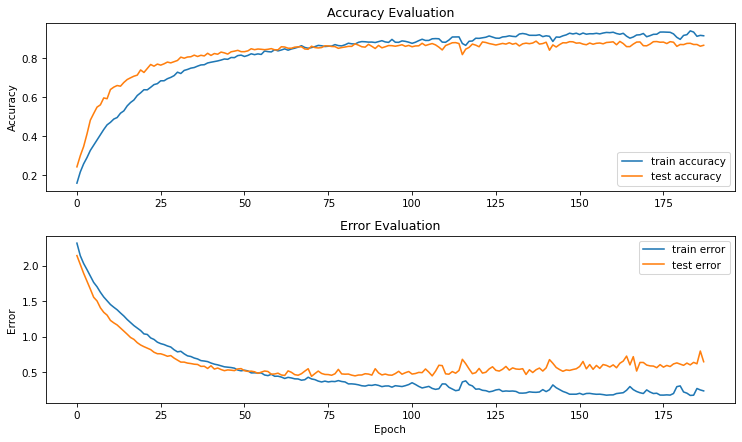


 Plots for Model  2


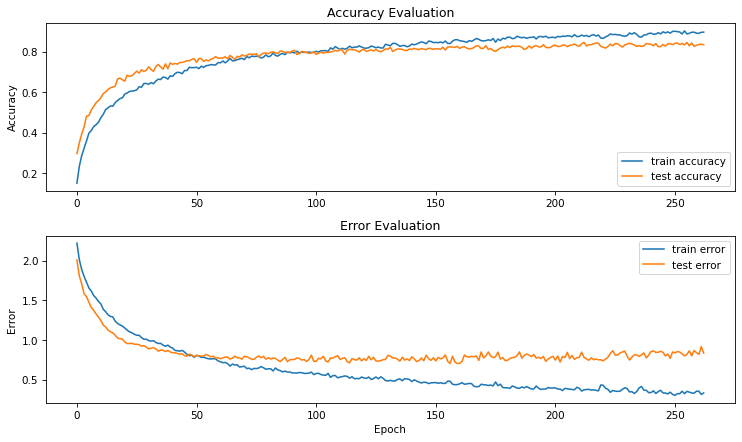


 Plots for Model  3


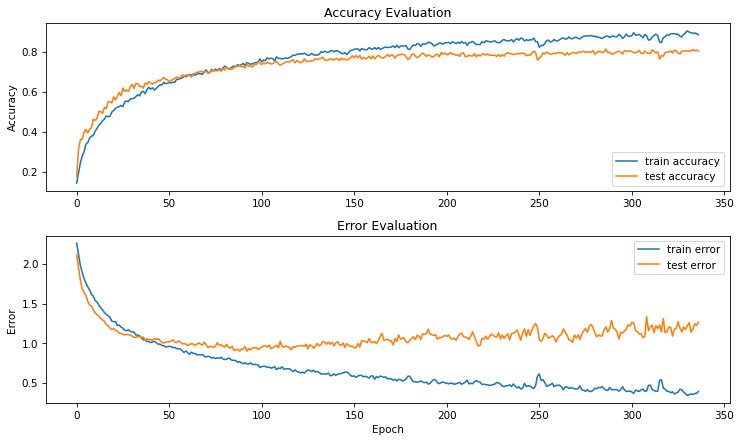


 Plots for Model  4


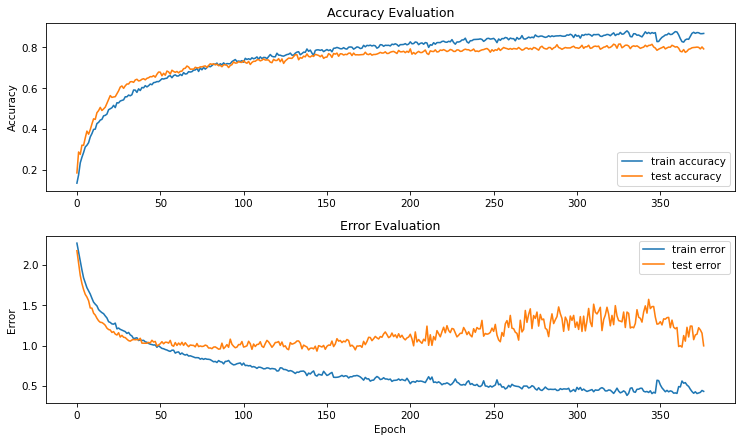


 Plots for Model  5


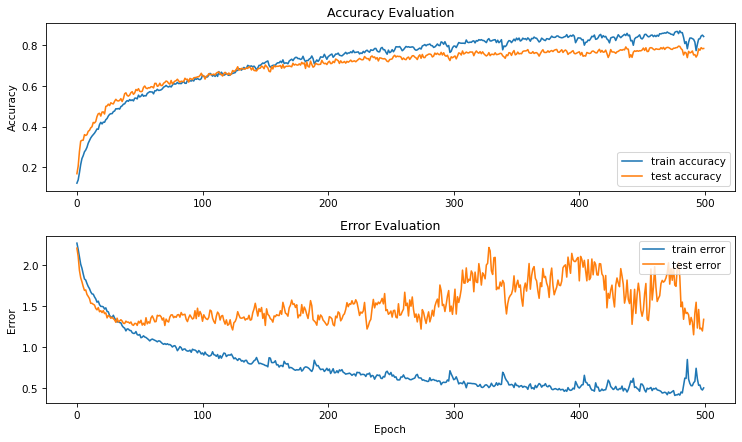


 Plots for Model  6


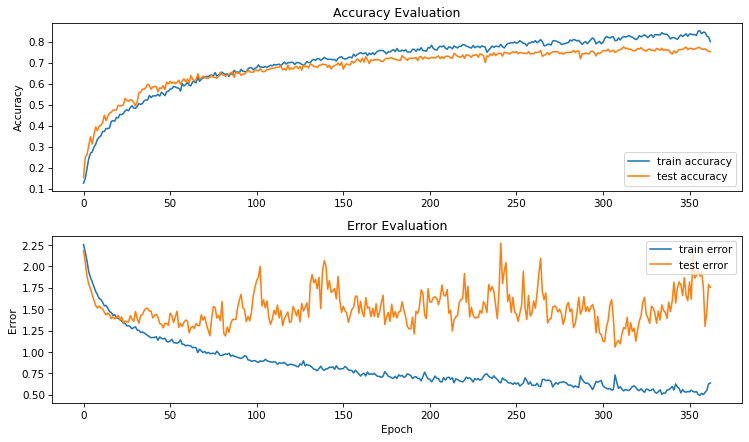

In [10]:
model.plot_all_histories()

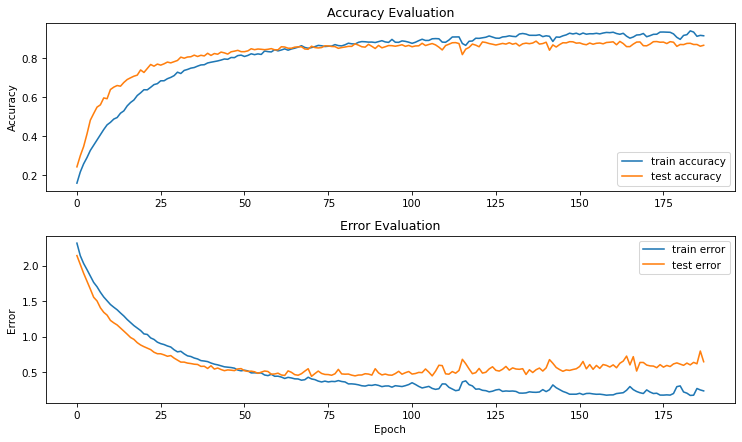

In [11]:
model.plot_history(which_model=1)  # BEST MODEL

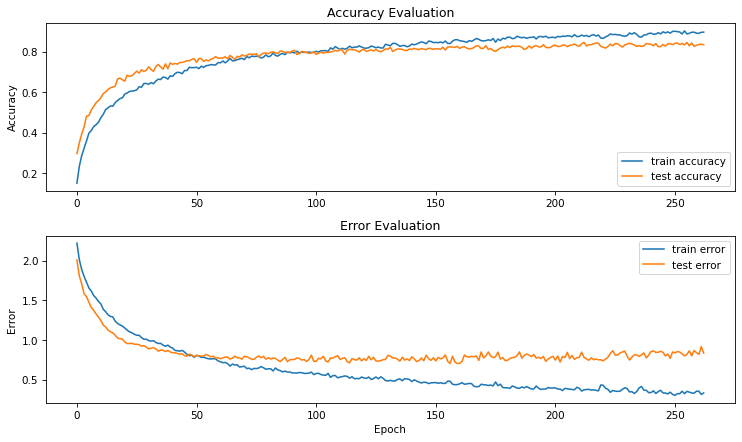

In [12]:
model.plot_history(which_model=2)

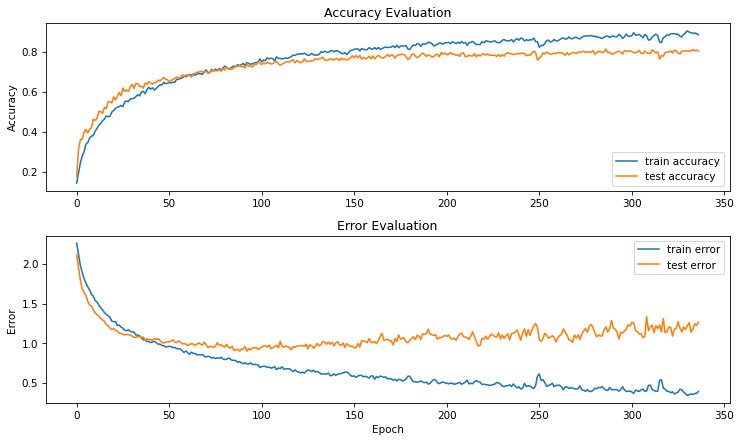

In [13]:
model.plot_history(which_model=3)

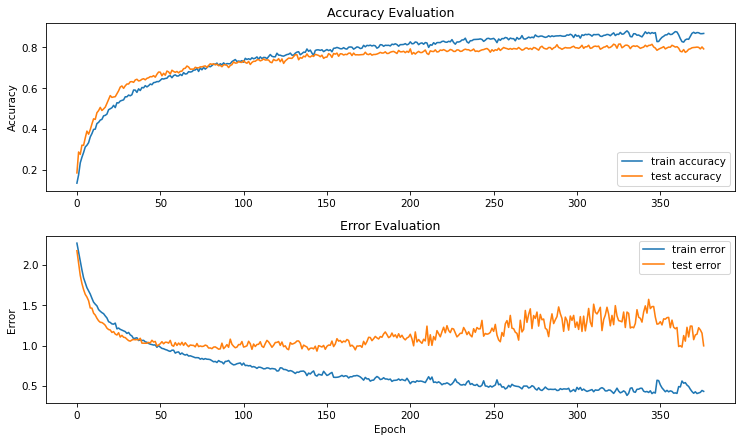

In [14]:
model.plot_history(which_model=4)

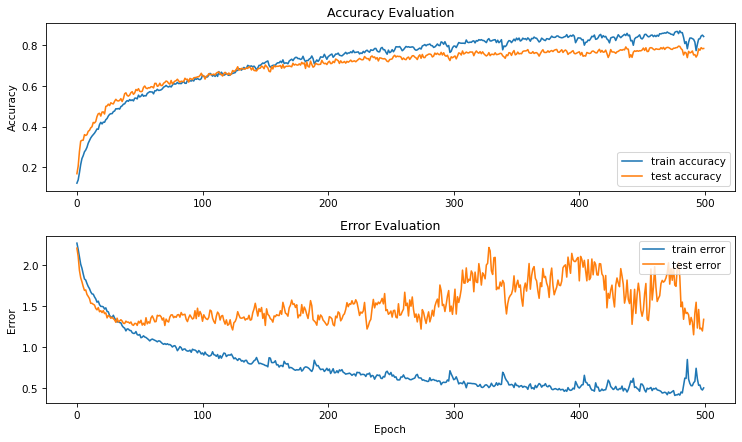

In [15]:
model.plot_history(which_model=5)

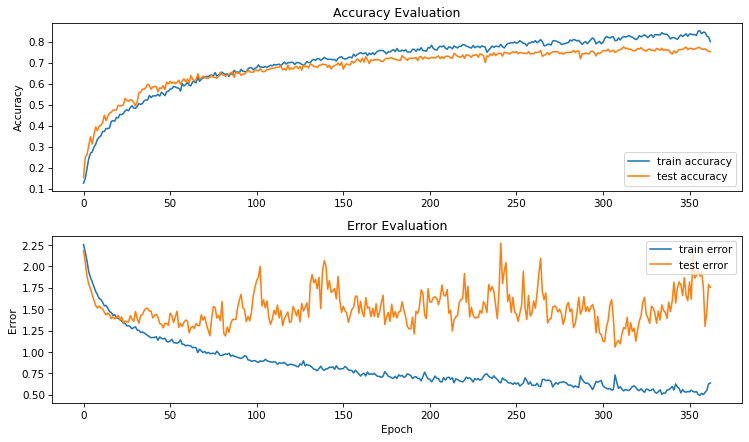

In [16]:
model.plot_history(which_model=6)

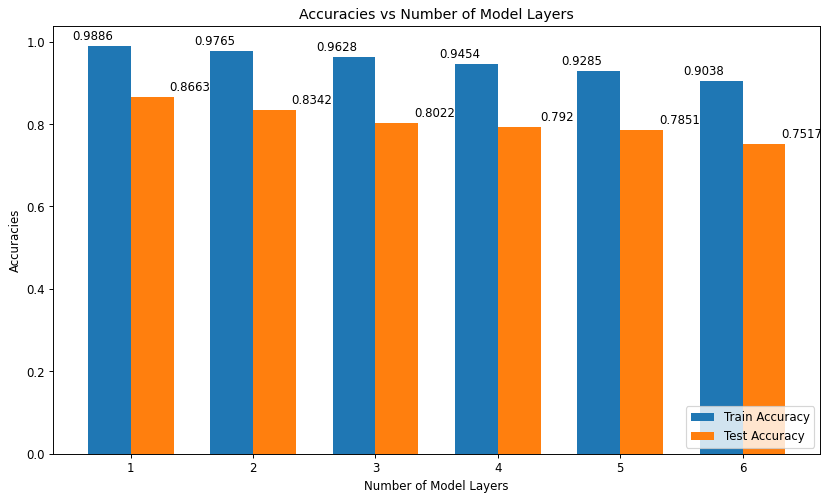

In [17]:
# Plot accuracies vs number of model layers

model.accuracies_vs_models()

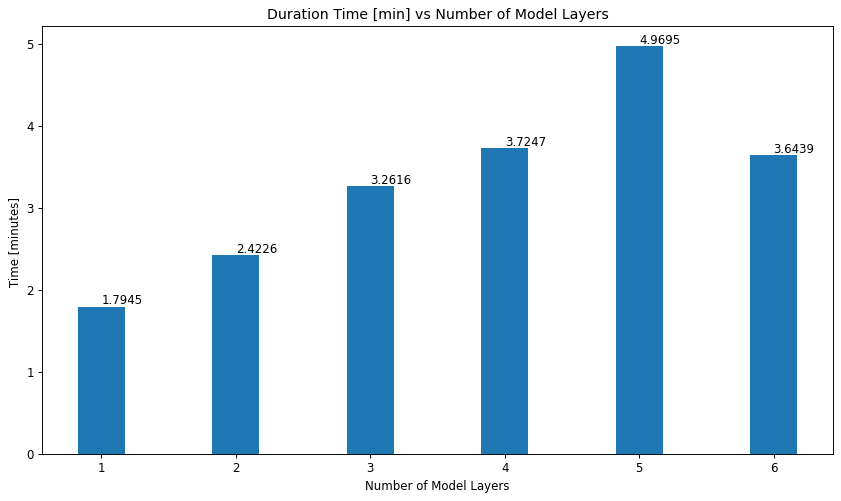

In [18]:
# Plot durations vs number of model layers

model.duration_vs_models()

In [19]:
# Save all generated models

model.save_all_models()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_1/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_2/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_3/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_4/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_5/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/saved_model_6/assets


In [20]:
# Save the best model. change the argument accordingly

model.save_best_model(best_model=1)

INFO:tensorflow:Assets written to: models/saved_models_DP_0.4/best_model/assets


In [21]:
# from keras.models import load_model

In [22]:
# Load back the best model

best_model = load_model("models/saved_models_DP_0.4/best_model")

In [23]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
